# Step 1: Load the Dataset

In [1]:
import pandas as pd

# Define file path (update this based on your dataset location)
file_path = "/Users/vishwpatel/Desktop/EAI 6020/Module 3/training.1600000.processed.noemoticon.csv"

# Define column names based on dataset documentation
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load the dataset with proper encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=column_names)

# Display the first 5 rows of the dataset
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Step 2: Check for Missing Values

In [2]:
# Check if there are any missing values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


# Step 3: Explore Sentiment Distribution

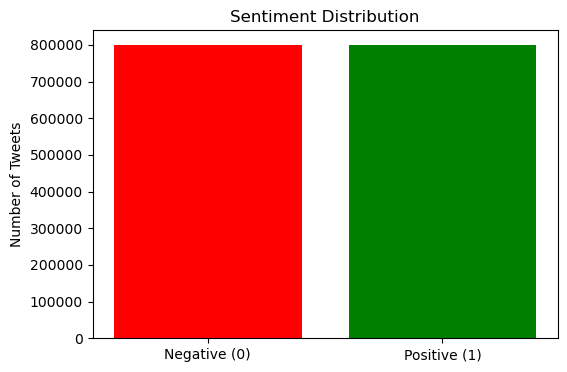

Sentiment Distribution in %:
 target
0    50.0
1    50.0
Name: count, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# Convert sentiment labels: 4 → 1 (Positive Sentiment)
df['target'] = df['target'].replace(4, 1)

# Display sentiment distribution
sentiment_counts = df['target'].value_counts()
sentiment_labels = ['Negative (0)', 'Positive (1)']

# Plot the sentiment distribution
plt.figure(figsize=(6,4))
plt.bar(sentiment_labels, sentiment_counts, color=['red', 'green'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Tweets")
plt.show()

# Print the percentage of each sentiment
print("Sentiment Distribution in %:\n", (sentiment_counts / len(df)) * 100)


# Step 4: Display Sample Tweets

In [4]:
# Display some sample tweets for each sentiment
print("\n🔴 Negative Tweets:")
print(df[df['target'] == 0]['text'].sample(5, random_state=42).values)

print("\n🟢 Positive Tweets:")
print(df[df['target'] == 1]['text'].sample(5, random_state=42).values)



🔴 Negative Tweets:
["@xnausikaax oh no! where did u order from? that's horrible "
 'A great hard training weekend is over.  a couple days of rest and lets do it again!  Lots of computer time to put in now '
 "Right, off to work  Only 5 hours to go until I'm free xD"
 'I am craving for japanese food '
 'Jean Michel Jarre concert tomorrow  gotta work 7-3 before though ']

🟢 Positive Tweets:
['Is lookin 4ward to a long weekend  really dont want to go to work 2day tho =[ x'
 '#myweakness  Is music and i live to meet the people who make it '
 'figured out the Internet on my new iPod '
 "@hillsongunited can't wait to worship with you guys tonight. it'll be so much fun "
 "@sillybeggar Congrats James !! I'm sure the book is going to be a huge success "]


# Step 5: Data Preprocessing - Cleaning Tweets

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (only need to run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove mentions (@username) and links (http, https)
    tweet = re.sub(r'@\w+|http\S+', '', tweet)
    
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Tokenize the words
    words = word_tokenize(tweet)
    
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back into a sentence
    return ' '.join(words)

# Apply cleaning function to dataset
df['clean_text'] = df['text'].apply(clean_tweet)

# Show original vs cleaned tweets
df[['text', 'clean_text']].head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishwpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishwpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishwpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
5,@Kwesidei not the whole crew,whole crew
6,Need a hug,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bit bit lol im fine...
8,@Tatiana_K nope they didn't have it,nope didnt
9,@twittera que me muera ?,que muera


# Step 6: Convert Text to Numerical Format using TF-IDF

What is TF-IDF?

TF (Term Frequency): Measures how frequently a word appears in a document.

IDF (Inverse Document Frequency): Gives less weight to common words across documents.

Output: Each tweet is converted into a vector of numerical values, which can be used as input for our ML model.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words

# Fit and transform the cleaned tweets
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to a dense DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show first few rows of transformed data
tfidf_df.head()


,aa,aaah,aah,aaron,ab,abandoned,abc,ability,abit,able,...,yum,yumm,yummy,yup,zac,zealand,zero,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 7: Train a Logistic Regression Model for Sentiment Analysis

Validation Accuracy: 0.7743

🔹 Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    119907
           1       0.76      0.80      0.78    120093

    accuracy                           0.77    240000
   macro avg       0.77      0.77      0.77    240000
weighted avg       0.77      0.77      0.77    240000



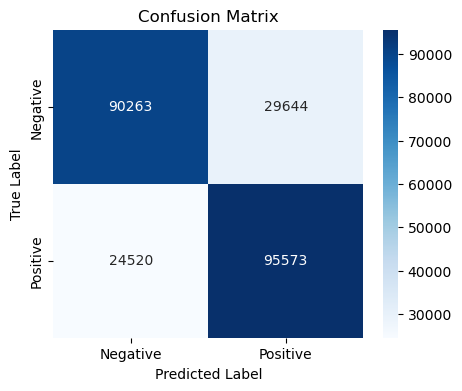

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Features (X) and Target (y)
X = X_tfidf  # TF-IDF features
y = df['target']  # Sentiment labels (0 = Negative, 1 = Positive)

# Step 2: Split the dataset into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Step 4: Model Evaluation on Validation Set
y_pred_valid = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy:.4f}")

# Step 5: Model Evaluation on Test Set
y_pred_test = log_reg.predict(X_test)
print("\n🔹 Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Step 8: Model Deployment

<b>Step 1: Save the Trained Model </b>

In [8]:
import pickle

# Save the trained Logistic Regression model
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(log_reg, model_file)

# Save the TF-IDF Vectorizer as well
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!


<b>Step 2: Build an API using Flask</b>